In [ ]:
!pip3 install newspaper3k #If requested, install dependent library '!pip install beautifulsoup4' and use 'from bs4 import BeautifulSoup'

In [ ]:
import nltk
import pandas as pd
nltk.download('punkt')
from newspaper import Article

In [ ]:
df = pd.read_csv('dailymail2022.csv') #change here to your file path 

In [ ]:
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='1', axis=1)
df = df.drop(labels='2', axis=1)

In [ ]:
df.columns = ['url']   # This will rename column header to 'url'

In [ ]:
df['url'].isnull().sum() # check if there are NaN values // Result has to be 0 to continue

In [ ]:
df = df.dropna(axis=0) # Run this cell to delete NaN values, if any

In [ ]:
df = df.astype({'url':'string'}) # Change column type to 'string'

In [ ]:
df.info() # Check if last step worked

In [ ]:
# This function will loop through the df rows and extract the title from each url 
def get_titles(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        article.nlp()
        return article.title
    except:
        print('***FAILED TO DOWNLOAD***', article.url)

In [ ]:
df['Titles'] = df.url.apply(get_titles) # This creates new column called 'Titles' and start loop using function 'get_titles'

In [ ]:
df.head() # Check if new column with titles was added

This is how the output looks like

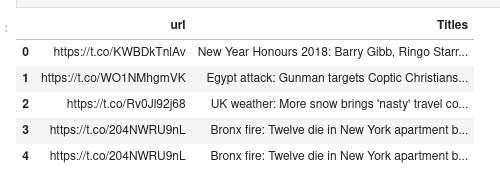

In [ ]:
df = df.drop_duplicates(subset='Titles') # I got some duplicated url/titles. This code will remove duplicates

In [ ]:
df.to_csv('name.csv') # Name using outlet+year eg. bbc2017